# Data Science in Python

Python has a large number of tools available for doing data science. 

The core of Data Science in Python revolves around some a set of core modules, typically comprising {scipy, numpy, pandas, matplotlib and scikit-learn}. 

Here we will explore the basics of these modules and what they do. 

<img src="img/scipy.png" width="300px">

<div class="alert alert-success">
Scipy is an 'ecosystem', including a collection of open-source packages for scientific computing in Python.
</div>

<div class="alert alert-info">
The scipy organization website is 
<a href="https://www.scipy.org/" class="alert-link">here</a>,
including a 
<a href="https://www.scipy.org/about.html" class="alert-link">description</a>
of the 'ecosystem', materials for 
<a href="https://www.scipy.org/getting-started.html" class="alert-link">getting started</a>, 
and extensive 
<a href="https://docs.scipy.org/doc/scipy/reference/tutorial/" class="alert-link">tutorials</a>.
</div>

In [1]:
# You can import the full scipy package, typically shortened to 'sp'
import scipy as sp

# However, it is perhaps more common to import particular submodules
#  For example, let's import the stats submodule
import scipy.stats as sts

Scipy has a broad range of functionality.

For a simple / random example, let's use it's stats module to model flipping a coin with [Bernouilli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), which is a distribution that can model a random variable that can be either 0 (call it Tails) or 1 (call it Heads). 

In [2]:
# Let's model a fair coin - with 0.5 probability of being Heads
sts.bernoulli.rvs(0.5)

0

In [3]:
# Let's flip a bunch of coins!
coin_flips = [sts.bernoulli.rvs(0.5) for i in range(100)]
print('The first ten coin flips are: ', coin_flips[:10])
print('The percent of heads from this sample is: ', sum(coin_flips) / len(coin_flips) * 100, '%')

The first ten coin flips are:  [1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
The percent of heads from this sample is:  60.0 %


<img src="img/numpy.png" width="300px">

<div class="alert alert-success">
Numpy contains an array object (for multi-dimensional data, typically of uniform type), and operations for linear algrebra and analysis on arrays. 
</div>

<div class="alert alert-info">
The numpy website is
<a href="http://www.numpy.org/" class="alert-link">here</a>,
including their official 
<a href="https://docs.scipy.org/doc/numpy-dev/user/quickstart.html" class="alert-link">quickstart tutorial</a>.
</div>


Note: 
An array is a 'a systematic arrangement of similar objects, usually in rows and columns' (definition from [Wikipedia](https://en.wikipedia.org/wiki/Array))

In [4]:
# Numpy is standardly imported as 'np'
import numpy as np

In [5]:
# Numpy's specialty is linear algebra and arrays of (uniform) data 

# Define some arrays
#  Arrays can have different types, but all the data within an array needs to be the same type
arr_1 = np.array([1, 2, 3])
arr_2 = np.array([4, 5, 6])
bool_arr = np.array([True, False, True])
str_arr = np.array(['a', 'b', 'c'])

In [6]:
# Note that if you try to make a mixed-data-type array, numpy won't fail, 
#  but it will (silently)
arr = np.array([1, 'b', True])

# Check the type of array items
print(type(arr[0]))
print(type(arr[2]))

<class 'numpy.str_'>
<class 'numpy.str_'>


In [7]:
# These array will therefore not act like you might expect
# The last item looks like a Boolen
print(arr[2])

# However, since it's actually a string, it won't evaluate like a Boolean
print(arr[2] == True)

True
False


<div class="alert alert-info">
For more practice with numpy, check out the collection 
<a href="https://github.com/rougier/numpy-100" class="alert-link">numpy exercises</a>.
</div>

![pandas](img/pandas.png)

<div class="alert alert-success">
Pandas is a package for organizing data in data structures, and performing data analysis upon them.
</div>

<div class="alert alert-info">
The official pandas website is 
<a href="http://pandas.pydata.org/" class="alert-link">here</a>,
including materials such as 
<a href="http://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html" class="alert-link">10 minutes to pandas</a>
and a tutorial on 
<a href="http://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html" class="alert-link">essential basic functionality</a>.
</div>

Pandas main data object is the DataFrame, which is a powerful data object to store mixed data types together with labels. 

Pandas dataframes also offer a large range of available methods for processing and analyzing data.

If you are familiar with R, pandas dataframes object and approaches are quite similar to R.

In [8]:
# Pandas is standardly imported as pd
import pandas as pd

In [9]:
# Let's start with an array of data, but we also have a label for each data item
dat_1 = np.array(['London', 'Washington', 'London', 'Budapest'])
labels = ['Ada', 'Alonzo', 'Alan', 'John']

In [10]:
# Pandas offers the 'Series' data object to store 1d data with axis labels
pd.Series?

In [11]:
# Let's make a Series with out data, and check it out
ser_1 = pd.Series(dat_1, labels)
ser_1.head()

Ada           London
Alonzo    Washington
Alan          London
John        Budapest
dtype: object

In [12]:
# If we have some different data (with the same labels) we can make another Series
dat_2 = [36, 92, 41, 53]
ser_2 = pd.Series(dat_2, labels)

ser_2.head()

Ada       36
Alonzo    92
Alan      41
John      53
dtype: int64

In [13]:
# However, having a collection of series can quickly get quite messy
#  Pandas therefore offer the dataframe - a powerful data object to store mixed type data with labels
pd.DataFrame?

In [14]:
# There are several ways to initialize a dataframe
#  Here, we provide a dictionary made up of our series
df = pd.DataFrame(data={'Col-A': ser_1, 'Col-B':ser_2}, index=labels)

In [15]:
# For categorical data, we can check how many of each value there are
df['Col-A'].value_counts()

London        2
Washington    1
Budapest      1
Name: Col-A, dtype: int64

In [16]:
# Note that dataframes are actually collections of Series
#  When we index the df, as above, we actually pull out a Series
#    So, the '.value_counts()' is actually a Series method
type(df['Col-A'])

pandas.core.series.Series

In [17]:
# Pandas also gives us tons an ways to directly explore and analyze data in dataframes
#  For example, the mean for all numberic data columns
df.mean()

Col-B    55.5
dtype: float64

<div class="alert alert-info">
For more practice with pandas, you can try some collections of exercises, including
<a href="https://github.com/guipsamora/pandas_exercises" class="alert-link">this one</a>
and
<a href="https://github.com/ajcr/100-pandas-puzzles" class="alert-link"> this one</a>.
</div>

![matplotlib](img/matplotlib.png)

<div class="alert alert-success">
Matplotlib is a library for plotting, in particular for 2D plots.
</div>

<div class="alert alert-info">
The official numpy 
<a href="http://matplotlib.org/" class="alert-link">website</a>
includes the official
<a href="http://matplotlib.org/users/pyplot_tutorial.html" class="alert-link">tutorial</a>
as well as a 
<a href="https://matplotlib.org/gallery.html" class="alert-link">gallery</a>
of examples that you can start from and modify.
</div>

In [18]:
# This magic command is used to plot all figures inline in the notebook
%matplotlib inline

In [19]:
# Matplotlib is standardly imported as plt
import matplotlib.pyplot as plt

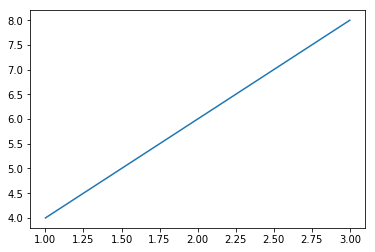

In [20]:
# Plot a basic line graph
plt.plot([1, 2, 3], [4, 6, 8])

<div class="alert alert-info">
There are also many external materials for using matplotlib, including
<a href="https://github.com/rougier/matplotlib-tutorial" class="alert-link">this one</a>.
</div>

![sklearn](img/sklearn.png)

<div class="alert alert-success">
Scikit-Learn is a packages for data mining, data analysis, and machine learning. 
</div>

<div class="alert alert-info">
Here is the official scikit-learn
<a href="http://scikit-learn.org/" class="alert-link">website</a>
including their official
<a href="http://scikit-learn.org/stable/tutorial/basic/tutorial.html" class="alert-link">tutorial</a>.
</div>

In [21]:
# Import sklearn
import sklearn as skl

In [22]:
# Check out module description
skl?

We will get into machine learning and working with sklearn later on in the tutorials.

## External Resources

There are many, many resources to learn how to use those packages. 

The links above include the official documentation and tutorials, which are the best place to start.

You can also search google for other resources and exercises.

<div class="alert alert-info">
A particularly good (and free) resource, covering all these tools is the
<a href="https://github.com/jakevdp/PythonDataScienceHandbook/" class="alert-link">Data Science Handbook </a>
by
<a href="https://github.com/jakevdp" class="alert-link">Jake Vanderplas</a>.
</div>